In [7]:

import pandas as pd
import random
import matplotlib.pyplot as plt

import sys
sys.path.append("../configs")
from matplot import matplot_config, tex_config

import matplotlib
matplotlib.rcParams.update(matplot_config)
# matplotlib.use("pgf")
# matplotlib.rcParams.update(tex_config)

# Wong colors:
# color_palette = "e69f00 56b4e9 009e73 f0e442 0072b2 d55e00 cc79a7".split()
# color_palette = [f"#{c}" for c in color_palette]

import os
# original data
# target = "no"
language_colors = {
    # gray for english
    "en": "#999999",
    # orange for polish:
    "pl": "#f57600",
    # red for france:
    "fr": "#e63055",
    # green for lithuania:
    "lt": "#5ba300",
    # blue for norway
    "no": "#0073e6",
    "hu": "#0073e6",
}

color_palette = "#e6308a #5ba300 #0073e6 #f57600".split()

hatch_patterns = ["|", "-", "+", "x", "o", "O", ".", "*"]

def plot_comprate(df, figname=None, bins=50, hatch_patterns=hatch_patterns, color_palette=color_palette, figX=7, figY=3, show_y_labels=True):
    fig, ax = plt.subplots()
    # set fig size
    fig.set_size_inches(figX, figY)
    # ax.set_xlabel('Length')
    # ax.set_ylabel('Samples')
    # ax.grid(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    if not show_y_labels:
        ax.set_yticklabels([])
    quantile = 0.99
    # disable y ticks
    ax.yaxis.set_ticks_position('none')
    
    df = df[["en"] + [col for col in df.columns if col != "en"]]
    for i in range(len(df.columns)):
        length = df.iloc[:, i].str.len()
        length = length[length < length.quantile(quantile)]
        color = color_palette[i]
        hatch = hatch_patterns[i]
        ax.hist(length, bins, density=False, facecolor=color, alpha=0.6, hatch=hatch)
    ax.legend(df.columns)

    # save plt:
    # if figname:
    #     fig = plt.gcf()
    #     fig.savefig(figname, format="pgf", bbox_inches="tight")
    # save as pdf:
    if figname:
        fig.savefig(figname, format="pdf", bbox_inches="tight")
    plt.show()

def plot_comprates(df1, df2, desc1="Desc1", desc2="Desc2", figname=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))
    
    # Set labels and grid for ax1
    ax1.set_xlabel('Length')
    ax1.set_ylabel('Samples')
    ax1.grid(False)
    ax1.set_title(desc1)
    
    # Set labels and grid for ax2
    ax2.set_xlabel('Length')
    # ax2.set_ylabel('Samples')
    ax2.grid(False)
    ax2.set_title(desc2)

    bins = 30
    quantile = 0.99
    alpha = 0.6

    # always place "en" column first:
    df1 = df1[["en"] + [col for col in df1.columns if col != "en"]]
    df2 = df2[["en"] + [col for col in df2.columns if col != "en"]]
    
    for i in range(len(df1.columns)):
        length = df1.iloc[:, i].str.len()
        length = length[length < length.quantile(quantile)]
        color = color_palette[i]
        ax1.hist(length, bins, density=False, facecolor=color, alpha=alpha)
    ax1.legend(df1.columns)
    
    for i in range(len(df2.columns)):
        length = df2.iloc[:, i].str.len()
        length = length[length < length.quantile(quantile)]
        color = color_palette[i]
        ax2.hist(length, bins, density=False, facecolor=color, alpha=alpha)
    ax2.legend(df2.columns)
    
    # Save the plot if figname is provided
    if figname:
        fig.savefig(figname, format="pgf", bbox_inches="tight")
    
    plt.show()

# europarl

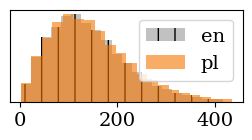

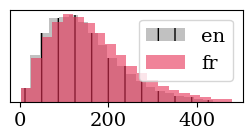

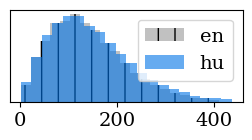

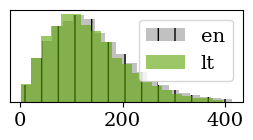

In [8]:
for target in ["pl", "fr", "hu", "lt"]:
    path = f"europarl/en-{target}.csv"
    if not os.path.exists(path):
        path = f"opensubtitles/datasets/{target}-en.csv"
    df = pd.read_csv(path, nrows=1000000)
    color_palette = [language_colors["en"], language_colors[target]]
    latex_path = f"../LaTeX/ecai-template/Figures/europarl-length-en-{target}.pdf"
    plot_comprate(df, figname=latex_path, bins=20, hatch_patterns=["|", ""], color_palette=color_palette, figX=3, figY=1.2, show_y_labels=False)
    # plot_comprate(df, bins=20, hatch_patterns=["|", ""], color_palette=color_palette, figX=3, figY=1.2, show_y_labels=False)

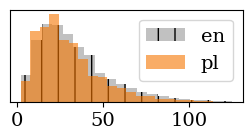

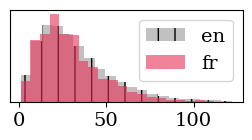

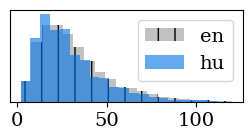

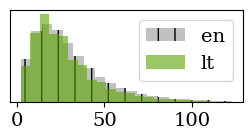

In [9]:
for target in ["pl", "fr", "hu", "lt"]:
    path = f"opensubtitles/datasets/en-{target}.csv"
    if not os.path.exists(path):
        path = f"opensubtitles/datasets/{target}-en.csv"
    df = pd.read_csv(path, nrows=1000000)
    latex_path = f"../LaTeX/ecai-template/Figures/length_en-{target}-original.pdf"

    color_palette = [language_colors["en"], language_colors[target]]
    plot_comprate(df, figname=latex_path, bins=20, hatch_patterns=["|", ""], color_palette=color_palette, figX=3, figY=1.2, show_y_labels=False)

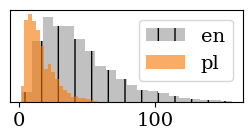

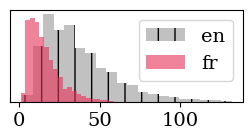

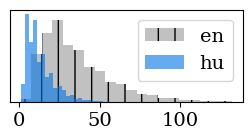

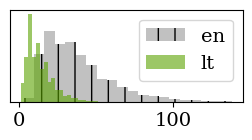

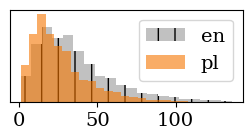

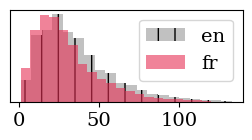

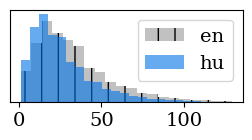

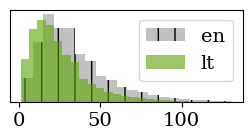

In [11]:
for compr in [0.5, 1.0]:
    for target in ["pl", "fr", "hu", "lt"]:
        path = f"opensubtitles/compressed/en-{target}-{compr}.train.csv"
        df = pd.read_csv(path)
        latex_path = f"../LaTeX/ecai-template/Figures/length_en-{target}-{compr}.pdf"
        # plot_comprate(df, figname=latex_path, bins=20, hatch_patterns=["|", ""], figX=3, figY=1.2, show_y_labels=False)

        color_palette = [language_colors["en"], language_colors[target]]
        plot_comprate(df, figname=latex_path, bins=20, hatch_patterns=["|", ""], color_palette=color_palette, figX=3, figY=1.2, show_y_labels=False)

                                                  en  \
0  can I feed peanuts to the elephants at your we...   
1  of course there'll be elephants it's a stereot...   
2  thank you Penny and Leonard I was kind of hopi...   
3  yeah it's just we haven't done it yet and I th...   
4  it doesn't have to be tonight how about this w...   

                                                  no  
0                   Får jeg gi elefantene peanøtter?  
1                    Jo, men de får ingen peanøtter.  
2                    Jeg vil sitte med Anu, Leonard.  
3  Vi bør sjekke at vi passer sammen før vi gifte...  
4  Det må ikke skje i kveld. Jeg kan ordne rom på...  


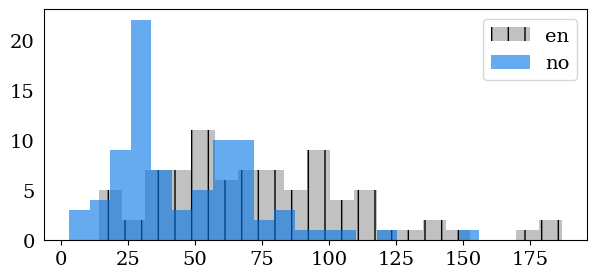

In [6]:
# bbt data
bbt_df = pd.read_csv("big-bang-theory-all.csv", sep="|")
print(bbt_df.head())
latex_path = "../LaTeX/ecai-template/Figures/length_bbt.pdf"
local_path = "figures/length_bbt.pgf"
# plot_comprate(bbt_df, figname=latex_path, bins=20, hatch_patterns=["|", ""])

target = "no"
color_palette = [language_colors["en"], language_colors[target]]
plot_comprate(bbt_df, figname=latex_path, bins=20, hatch_patterns=["|", ""], color_palette=color_palette)

In [13]:
# find unique langs from the compressed folder
import os
folder = "opensubtitles/compressed"
langs = list(set([f.split("-", 2)[1] for f in os.listdir(folder) if ".info" not in f]))
print(langs)

['sq', 'fr', 'lt', 'is', 'ms', 'pl', 'da', 'hu', 'eu', 'ro', 'no', 'de']


no


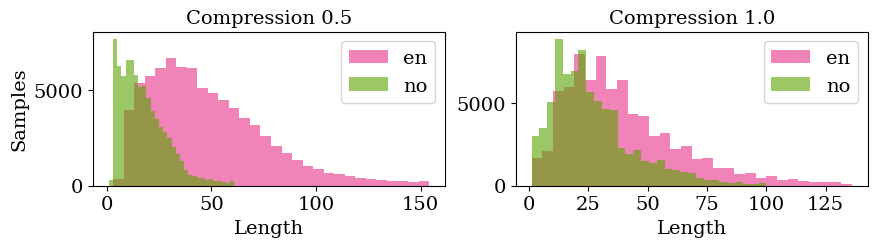


fr


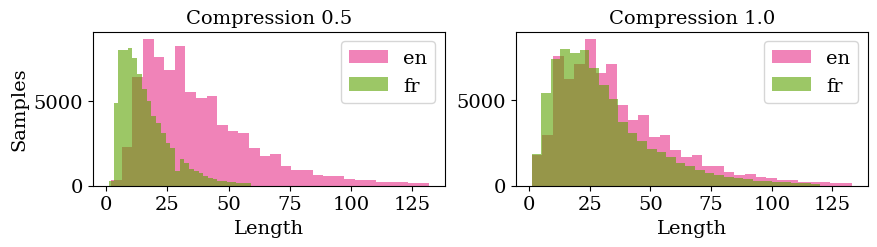


de


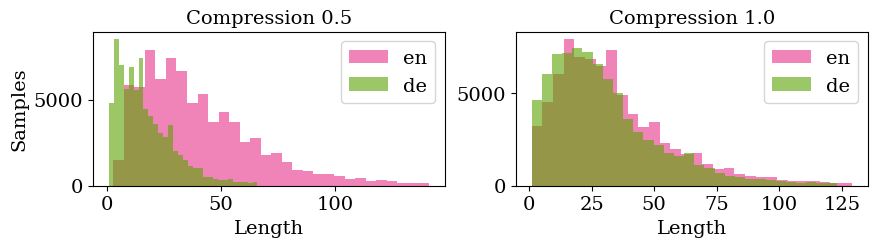

In [16]:
import os
lang = "no"
# langs = ["fr", "de"]

plt.rcParams['figure.figsize'] = [5, 2]

langs = ["no", "fr", "de"]

for lang in langs:
    dfs = sorted(os.listdir(folder))
    dfs = [df for df in dfs if f"-{lang}-" in df]
    to_save = [0.5, 1.0]
    # to_save = [0.5]

    to_print = []
    for df in dfs:
        if not any(str(x) in df for x in to_save):
            continue
        if "train" not in df:
            continue
        to_print.append(pd.read_csv(f"{folder}/{df}"))
    #     print(df)
    #     plt.clf()
        # df = pd.read_csv(f"opensubtitles/compressed/{df}")
        # plot_comprate(df)
    print(lang)
    plot_comprates(*to_print, desc1=f"Compression {to_save[0]}", desc2=f"Compression {to_save[1]}")
    print()

In [ ]:
import numpy as np

dfs = sorted(os.listdir("opensubtitles/compressed/"))
compression_rates = np.arange(0.5, 1.05, 0.1)
compression_rates = [float(f"{x:.1f}") for x in compression_rates]

grouped = {}
for comp_rate in compression_rates:
    _dfs = [df for df in dfs if f"{comp_rate}.train" in df]
    grouped[comp_rate] = _dfs

csvs = grouped[0.5]

In [ ]:
def merge(csv_group):
    english_mean = pd.DataFrame()
    lengths = {}
    for csv in csv_group:
        print(csv)
        df = pd.read_csv(f"opensubtitles/compressed/{csv}")
        en = df.iloc[:, 0]
        english_mean = pd.concat([english_mean, en], axis=1)
        lang_len = df.iloc[:, -1].str.len()
        lengths[df.columns[-1]] = lang_len
    
    lengths["en"] = english_mean.iloc[:, 0].str.len()
    return lengths
lengths = merge(csvs)

In [ ]:
length_df = pd.DataFrame(lengths)
length_df